In [3]:
import numpy as np
from numpy.random import rand
import csv
import h5py
import signal
import fast5
import fastq
import re
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras

In [4]:
"""
checks to see if gpu is working
"""
# Creates a graph.
#a = tf.constant([1.0, 2.0, 3.0, 4.0, 5.0, 6.0], shape=[2, 3], name='a')
#b = tf.constant([1.0, 2.0, 3.0, 4.0, 5.0, 6.0], shape=[3, 2], name='b')
#c = tf.matmul(a, b)
# Creates a session with log_device_placement set to True.
#sess = tf.Session(config=tf.ConfigProto(log_device_placement=True))
# Runs the op.
#print(sess.run(c)) 

'\nchecks to see if gpu is working\n'

In [5]:
"""
this function divides the length of whatever 
size the list is by 4 for a 4mer
"""
def BaseFunction(x,y): 
    return((len(x)//y),y)

In [6]:
"""
this function divides the length of whatever 
size the list is by 40 for a 40mer
"""
def SigFunction(x,y): 
    return((y),((x//y)))

In [7]:
"""
this function provides information about the array    
"""
def array_inspect(x):
    print ("Shape is",(x.shape))
    print(("Length is",len(x)))
    print(("Dimension is",x.ndim))
    print(("Total Size is",x.size))
    print(("Type is",x.dtype))
    print(("Type Name is",x.dtype.name))
    #print(("Mean is",(x).mean))

In [8]:
"""
this function normalizes the raw signal resistances
from each read by dividing by the mean(or std?)
"""
def normalize(x,y):
    z=np.divide(x,y)
    #np.savetxt("NormalizedSigArray_{}.csv".format(),(z), delimiter=",")
    return z

In [9]:
def divider(x,y):
    a=np.divide(x,y)
    return a

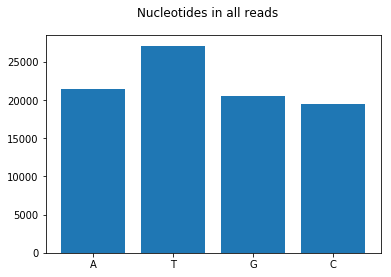

In [10]:
"""
This cell does the following
    1)Imports the bases
    2)trims off the new lines and digits
    3)converts them to a list
    4)converts them to a code of 0123 instead of ATCG
"""
f = open("fasta/sampled_read.fasta","r") #opens the file with the reads
a = f.read()
b = (a.split(">", 11))
base = [re.sub(">|\n|\d", "",str) for str in b]
baseA0 = [re.sub("A","0",str) for str in base]
baseT1 = [re.sub("T","1",str) for str in baseA0]
baseG2 = [re.sub("C","2",str) for str in baseT1]
base_coded = [re.sub("G","3",str) for str in baseG2] 
A0=(a.count("A")) 
T1=(a.count("T"))
G2=(a.count("G"))
C3=(a.count("C"))
#print(base_coded)
names = ['A', 'T', 'G', 'C']
values = [(A0), (T1), (G2), (C3)]

plt.subplot()
plt.bar(names, values)
plt.suptitle('Nucleotides in all reads')
plt.show()

In [11]:
"""
The purpose of this code is the following
1)Convert the coded reads to integer form 
2)Create an array inside the array with each read as a row
3)Create a 2D matric with the counts of all the possible scenarios 
presented in each row and the reads in each column
4)Create a 1D array with the readlengths
"""
kmer=[]
kmercount=[]
reads=[]
#readstring={}
readslength=[]
res=(len(base_coded))   
for x in range(res):
    l=list(int (i) for i in base_coded[x])
    for y in range(1):
        i=(l.count(y), l.count(y+1), l.count(y+2), l.count(y+3))
        kmercount.append(i)
        n=np.transpose(kmercount) # creates a 2D matrix with the bases counts as rows(ATGC) and the reads by columns
        kmer = n.view() #Create a view of the array with the same data
    d=np.asarray(l)
    d.resize((BaseFunction(d,4))) #Enter the list and the desired kmer for the function
    v=(str(d))
    reads.append(d) # store the reads in an array called reads
    c=len(d)
    readslength.append(c) #store the amt of kmer reads in readlength=

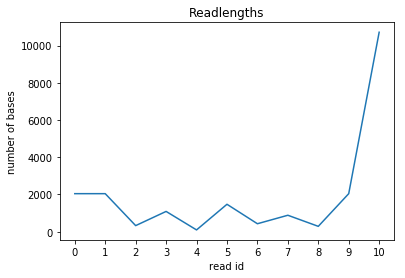

In [12]:
"""
The purpose of this code is the following
1) visualize the readlengths
"""
plt.ioff()
for i in range(1):
    plt.title("Readlengths")
    plt.ylabel('number of bases')
    plt.xlabel('read id')
    plt.plot(kmer[i])
    plt.xticks(np.arange(0, 11))
    plt.show()

In [13]:
"""
The cell does the following:
    1) Import the signal level data
    2) Normalize it to the mean fof the signal
    3) Appends the signal data from each read into a row of an array given the read count
"""
means = [] 
std = []
sig = []
for x in range(11):
    a=np.loadtxt("signal/signal_{}.txt".format(x)) # load the signal
    m=a.mean() #obtain the average signal from the read
    b=normalize(m,a) # divide each resistance by the average to normalize 
    c=b.size #obtains the number of resistance signals per read
    #print("resist",c)
    d=readslength[x] #obtains the kmers count per read
    #print("kmer",d)
    e=SigFunction(c,d) #figures out the average amount of resistances per kmer
    #print("Signal",x,"2D array size={}".format(e))
    b.resize(e) # Insert the (#bases,#sig) changes the signal level n signals wide
    sig.append(b)
array_inspect(sig[10])

Shape is (11063, 28)
('Length is', 11063)
('Dimension is', 2)
('Total Size is', 309764)
('Type is', dtype('float64'))
('Type Name is', 'float64')


In [14]:
for x in range(11):
    print("Training entries:{}, {}, labels: {}".format([x],len(reads[x]), len(sig[x])))

Training entries:[0], 2078, labels: 2078
Training entries:[1], 2078, labels: 2078
Training entries:[2], 361, labels: 361
Training entries:[3], 1168, labels: 1168
Training entries:[4], 109, labels: 109
Training entries:[5], 1444, labels: 1444
Training entries:[6], 453, labels: 453
Training entries:[7], 941, labels: 941
Training entries:[8], 351, labels: 351
Training entries:[9], 2078, labels: 2078
Training entries:[10], 11063, labels: 11063


In [15]:
#a=np.unique(y_val)
#print(a)
#b=enumerate(a)
#print (c)
#c=np.arange(0,254,1)
#print(c)
#ref =[]
#for x in range(254):
#    index={c[x]:a[x]}
#    ref.append(index)

#print(ref)
#for x in range(254):
#    y = ref[x].get(x)
#test=list(reads[10])

In [16]:
"""
The goal for this cell is to convert the reads to string
index the unique outputs for the 4mers
and create a new list of the indexed [1:256 or whatever]
reads for the model
"""
arr2=[] # In this code I converted the reads to a concated string of a 4mer
for i, v in enumerate(reads[10]): #Read 0 is the training data
    temp = ''
    #print(v)
    for w in v:
        #print(w)
        temp = temp + str(w)
    arr2.append(temp)
#print((arr2))
a=np.unique(arr2) # makes an array of every unique combo in the read for downstream indexing
#print(a)


In [17]:
converted=[]
converted2=[]
#print(a)
for x in arr2:
    #print(x)
    b=enumerate(a)
    c=[(i) for i, j in b if a[i]==(x)]
    converted.append(c)
for i, v in enumerate(converted): #Read 0 is the training data
    temp = ''
    #print(v)
    for w in v:
        #print(w)
        temp = temp + str(w)
    converted2.append(temp)
y_train=np.int16(converted2)
#plt.scatter(x=converted2,y=arr2,c=converted2)

In [18]:
print("Training entries: {}, labels: {}".format(len(reads[10]), len(sig[10])))

Training entries: 11063, labels: 11063


In [19]:
"""
Any cell under this cell is trash code or experimental
"""
x_train = sig[10]
x_test = sig[1]
print (y_train[110])
print (x_train[110])


65
[0.88627103 1.10233671 1.10233671 1.10233671 1.10233671 1.10233671
 1.10233671 1.10233671 1.10233671 1.10233671 1.0564901  1.0564901
 1.0564901  0.89865612 0.89865612 0.89865612 0.89865612 0.89865612
 0.89865612 1.07611629 1.07611629 1.07611629 1.07611629 0.91407013
 0.91407013 0.91407013 0.91407013 0.91407013]


In [20]:
model=tf.keras.models.Sequential()
#model.add(tf.keras.layers.Flatten(input_shape=(1,28)))# flatten using the API instead of np
model.add(tf.keras.layers.Dense(128, activation=tf.nn.relu)) # uses 128 neurons and is a feed forward rectilinear relu
model.add(tf.keras.layers.Dense(128, activation=tf.nn.relu)) # do the same thig for hidden layer 2
model.add(tf.keras.layers.Dense(256, activation=tf.nn.softmax)) # output layer with number of classifications (256) use softmax for output distribution


In [21]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [28]:
history = model.fit(x_train, y_train, epochs=30)

Epoch 1/30
11063/11063 [==============================] - 1s 47us/step - loss: 5.2801 - acc: 0.0163
Epoch 2/30
11063/11063 [==============================] - 1s 46us/step - loss: 5.2782 - acc: 0.0162
Epoch 3/30
11063/11063 [==============================] - 1s 54us/step - loss: 5.2738 - acc: 0.0164
Epoch 4/30
11063/11063 [==============================] - 0s 44us/step - loss: 5.2720 - acc: 0.0172
Epoch 5/30
11063/11063 [==============================] - 0s 44us/step - loss: 5.2675 - acc: 0.0158
Epoch 6/30
11063/11063 [==============================] - 0s 43us/step - loss: 5.2642 - acc: 0.0176
Epoch 7/30
11063/11063 [==============================] - 0s 44us/step - loss: 5.2611 - acc: 0.0171
Epoch 8/30
11063/11063 [==============================] - 0s 43us/step - loss: 5.2575 - acc: 0.0172
Epoch 9/30
11063/11063 [==============================] - 1s 55us/step - loss: 5.2540 - acc: 0.0170
Epoch 10/30
11063/11063 [==============================] - 1s 51us/step - loss: 5.2507 - acc: 0.0177

In [30]:
val_loss, val_acc = model.evaluate(x_train, y_train)
print(val_loss)
print(val_acc)


11063/11063 [==============================] - 0s 27us/step
5.156681812015352
0.020970803581182904


In [31]:
#model.save('tensorflow_basecaller.model')
#new_model = tf.keras.models.load_model('tensorflow_basecaller.model')

In [32]:
predictions = model.predict(x_train)
print(predictions)

[[1.1812859e-03 2.9048289e-03 3.9254557e-03 ... 2.0103615e-03
  1.6360276e-10 8.8319206e-11]
 [3.9058970e-05 8.9661364e-04 1.0631173e-04 ... 4.3454217e-03
  4.6368241e-16 8.8462943e-17]
 [5.2251550e-03 6.9185677e-03 2.8712151e-03 ... 1.8048658e-03
  4.2903051e-10 1.9639977e-10]
 ...
 [5.3731824e-04 1.2159926e-03 8.1343710e-04 ... 3.4346594e-03
  9.4026024e-13 3.7271220e-13]
 [5.6270808e-03 8.8478616e-03 2.8585426e-03 ... 1.8170844e-03
  1.4503472e-09 7.0808148e-10]
 [4.4399761e-03 7.1071736e-03 3.0437543e-03 ... 5.3282204e-04
  2.3454003e-11 1.0131193e-11]]


ValueError: x and y must have same first dimension, but have shapes (30,) and (1,)

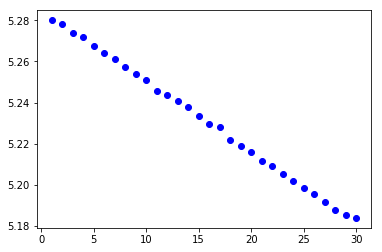

In [33]:
history_dict = history.history
history_dict.keys()

acc = history.history['acc']
#val_acc = history.history['val_acc']
loss = history.history['loss']
#val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

# "bo" is for "blue dot"
plt.plot(epochs, loss, 'bo', label='Training loss')
# b is for "solid blue line"
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

In [59]:
plt.clf()   # clear figure
acc_values = history_dict['acc']
val_acc_values = history_dict['val_acc']

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

KeyError: 'val_acc'

<Figure size 432x288 with 0 Axes>